In [2]:
#Importing all the library
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt

In [3]:
train1 = "C:\\User\Shiv\Desktop\news.csv"

In [4]:
pd1 = pd.read_csv("news.csv")

In [5]:
pd1.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
print(pd1.shape)

(6335, 4)


In [7]:
pd1 = pd1.set_index("Unnamed: 0")

In [8]:
pd1.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
#Extracting the TRAINING DATA FROM THE GIVEN DATA SET
y = pd1.label

In [10]:
pd1 = pd1.drop("label", axis = 1)

In [11]:
A_train, A_test , B_train , B_test = train_test_split(pd1["text"], y , test_size = 0.33, random_state = 53)

In [12]:
#Vectorizdr Classifier

count_vectorizer = CountVectorizer(stop_words= "english")
count_train = count_vectorizer.fit_transform(A_train)
count_test = count_vectorizer.transform(A_test)

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(A_train)
tfidf_test = tfidf_vectorizer.transform(A_test)

In [14]:
count_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [15]:
tfidf_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [16]:
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names())


differance = set(count_df.columns) - set(tfidf_df.columns)
differance

count_df.head()

tfidf_df.head()



,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#MODEL Comparison 
###Normalization can be applied by Normalize = True
### Confusion Matrix

def Confusion_matrix_index(cm,classes,normalize = False , title ='confuse matrix', cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation = 'nearest', cmap =cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes , rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype("float")/ cm.sum(axis= 1)[:, np.newaxis]
        print("Confusion matrix is Normalized")
    else:
        print("No Normalization in Confusion matrix")
        
    Threshold = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i , cm[i , j]),
        horizontalalignment= "center",
        color = "white" if cm [i ,j] > Threshold else "blue"
                
    plt.tight_layout()
    plt.ylabel("TRUE LABEL")
    plt.xlabel("prediction LABEL")

In [18]:
bot = PassiveAggressiveClassifier(50)

In [19]:
hash_vectorizer = HashingVectorizer(stop_words = "english")
hash_train = hash_vectorizer.fit_transform(A_train)
hash_test = hash_vectorizer.transform(A_test)

Accuracy we'll get is : 0.92
No Normalization in Confusion matrix


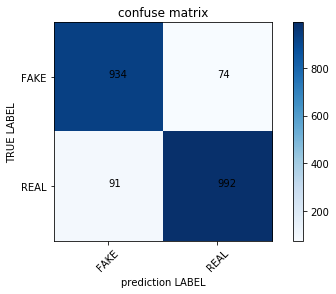

In [20]:
bot.fit(hash_train,B_train)
prediction = bot.predict(hash_test)
score = metrics.accuracy_score(B_test , prediction)
print("Accuracy we'll get is : %0.2f" %score)
cm = metrics.confusion_matrix(B_test, prediction , labels = ["FAKE","REAL"])
Confusion_matrix_index(cm, classes = ["FAKE","REAL"])